In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import glob
import os

In [10]:
joined_files = os.path.join("results-eval_final/", "*.csv")

In [11]:
joined_list = glob.glob(joined_files)

In [12]:
joined_files

'results-eval_final/*.csv'

In [13]:
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

In [14]:
df

,Unnamed: 0,Sentence,Pre-processed sentence,textblob-subjectivity,vader-pos,vader-neg,vader-neu,vader-compound,vader-polarity,sentiment-category,manual eval
0,0,"OK, so task number one.",ok task number one,0.500000,0.636,0.00,0.364,0.3612,Positive,NaN,Neutral
1,3,OK.,ok,0.500000,1.000,0.00,0.000,0.2960,Positive,NaN,Positive
2,4,So there is no.,no,0.000000,0.000,1.00,0.000,-0.2960,Negative,NaN,Negative
3,5,Uhm?,uhm,0.000000,0.000,0.00,1.000,0.0000,Neutral,NaN,Neutral
4,6,Tabs.,tabs,0.000000,0.000,0.00,1.000,0.0000,Neutral,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
4978,593,"Uh, I would have given four or five maybe, but...",uh would give four five maybe couple negative ...,0.400000,0.000,0.27,0.730,-0.5719,Negative,NaN,Negative
4979,594,How did you feel about obtaining the obtaining...,feel obtain obtain information gay get also th...,0.427778,0.000,0.00,1.000,0.0000,Neutral,NaN,Negative
4980,595,Scribe understand what the understandable.,scribe understand understandable,0.000000,0.600,0.00,0.400,0.4588,Positive,NaN,Positive
4981,596,"Also, I give it three because some things made...",also give three thing make sense,0.000000,0.000,0.00,1.000,0.0000,Neutral,NaN,Positive


In [2]:
results_filename = "results-eval_final/1-results.csv"

In [3]:
results_df = pd.read_csv(results_filename, index_col=0)

In [4]:
results_df

,Sentence,Pre-processed sentence,textblob-subjectivity,vader-pos,vader-neg,vader-neu,vader-compound,vader-polarity,sentiment-category,manual eval
0,"OK, so task number one.",ok task number one,0.500000,0.636,0.0,0.364,0.3612,Positive,NaN,Neutral
3,OK.,ok,0.500000,1.000,0.0,0.000,0.2960,Positive,NaN,Positive
4,So there is no.,no,0.000000,0.000,1.0,0.000,-0.2960,Negative,NaN,Negative
5,Uhm?,uhm,0.000000,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
6,Tabs.,tabs,0.000000,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...
868,"On having everything you need, so I'd say over...",everything need would say overall three,0.000000,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
869,I'd say I'd say.,would say would say,0.000000,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
870,Uhm?,uhm,0.000000,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
871,"Yeah, three OK 33 seems good enough.",yeah three ok 33 seem good enough,0.533333,0.646,0.0,0.354,0.7430,Positive,NaN,Positive


In [15]:
cm = pd.crosstab(df['manual eval'], df['vader-polarity'], rownames=['manual eval actual'], colnames=['vader-polarity predicted'])

In [16]:
cm

vader-polarity predicted,Negative,Neutral,Positive
manual eval actual,,,
Negative,415,99,141
Neutral,223,2512,839
Positive,4,66,684


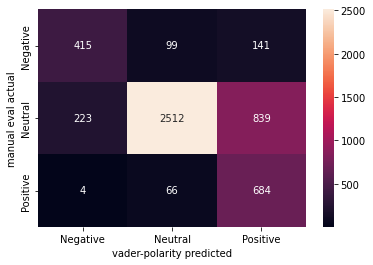

In [17]:
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

In [18]:
actual = df['manual eval'].tolist()
predicted = df['vader-polarity'].tolist()

In [19]:
metrics = classification_report(actual,predicted)
print('Classification report : \n',metrics)

Classification report : 
               precision    recall  f1-score   support

    Negative       0.65      0.63      0.64       655
     Neutral       0.94      0.70      0.80      3574
    Positive       0.41      0.91      0.57       754

    accuracy                           0.72      4983
   macro avg       0.67      0.75      0.67      4983
weighted avg       0.82      0.72      0.75      4983

